# Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

# Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1

# Some Attribute information:
    
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Objective:
    
To Guage Feature Importance

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 50)

In [3]:
#Read input file and understand the data
# "default" is my dependent variable
df = pd.read_csv("credit_data.csv")
df.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [4]:
df.shape

(1000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [6]:
df.nunique()

default                         2
account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
dtype: int64

In [7]:
# # Randomly select 50% data for this use case
# from sklearn.model_selection import train_test_split
# out_data,df =train_test_split(df_pre, train_size = 0.5,random_state=5)
# df_pre.shape
# df_pre.columns
# df_pre.head(5)

In [8]:
# Lets build a Ensemble model but need to modify the dataset first
obj_df=df.select_dtypes(include=['object'])
obj_df.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes


In [9]:
dff=pd.get_dummies(df, drop_first=True)

In [10]:
dff.shape

(1000, 49)

In [11]:
# Lets check for highly correlated variables
cor= dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.8) | (cor< -0.8)]

Series([], dtype: float64)

In [12]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['default']
X = dff.loc[:, dff.columns != 'default']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 48), (300, 48), (700,), (300,))

In [13]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

In [14]:
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

In [34]:
t = rf.predict_proba(X_test)
t

array([[0.638, 0.362],
       [0.464, 0.536],
       [0.39 , 0.61 ],
       [0.606, 0.394],
       [0.948, 0.052],
       [0.568, 0.432],
       [0.886, 0.114],
       [0.616, 0.384],
       [0.82 , 0.18 ],
       [0.8  , 0.2  ],
       [0.88 , 0.12 ],
       [0.384, 0.616],
       [0.876, 0.124],
       [0.192, 0.808],
       [0.242, 0.758],
       [0.672, 0.328],
       [0.89 , 0.11 ],
       [0.912, 0.088],
       [0.634, 0.366],
       [0.67 , 0.33 ],
       [0.786, 0.214],
       [0.578, 0.422],
       [0.946, 0.054],
       [0.99 , 0.01 ],
       [0.954, 0.046],
       [0.526, 0.474],
       [0.496, 0.504],
       [0.592, 0.408],
       [0.752, 0.248],
       [0.852, 0.148],
       [0.732, 0.268],
       [0.788, 0.212],
       [0.638, 0.362],
       [0.688, 0.312],
       [0.862, 0.138],
       [0.758, 0.242],
       [0.484, 0.516],
       [0.87 , 0.13 ],
       [0.94 , 0.06 ],
       [0.5  , 0.5  ],
       [0.52 , 0.48 ],
       [0.958, 0.042],
       [0.662, 0.338],
       [0.9

In [35]:
preds

array([0.362, 0.536, 0.61 , 0.394, 0.052, 0.432, 0.114, 0.384, 0.18 ,
       0.2  , 0.12 , 0.616, 0.124, 0.808, 0.758, 0.328, 0.11 , 0.088,
       0.366, 0.33 , 0.214, 0.422, 0.054, 0.01 , 0.046, 0.474, 0.504,
       0.408, 0.248, 0.148, 0.268, 0.212, 0.362, 0.312, 0.138, 0.242,
       0.516, 0.13 , 0.06 , 0.5  , 0.48 , 0.042, 0.338, 0.07 , 0.126,
       0.322, 0.418, 0.336, 0.276, 0.25 , 0.49 , 0.058, 0.456, 0.442,
       0.116, 0.278, 0.076, 0.596, 0.57 , 0.182, 0.25 , 0.476, 0.398,
       0.054, 0.376, 0.292, 0.106, 0.384, 0.322, 0.166, 0.368, 0.148,
       0.166, 0.3  , 0.258, 0.554, 0.488, 0.284, 0.168, 0.524, 0.122,
       0.182, 0.062, 0.508, 0.118, 0.364, 0.662, 0.714, 0.126, 0.11 ,
       0.328, 0.05 , 0.842, 0.458, 0.068, 0.222, 0.144, 0.55 , 0.702,
       0.346, 0.026, 0.33 , 0.19 , 0.034, 0.168, 0.32 , 0.262, 0.432,
       0.216, 0.552, 0.634, 0.258, 0.294, 0.124, 0.232, 0.204, 0.348,
       0.13 , 0.12 , 0.404, 0.328, 0.458, 0.246, 0.178, 0.344, 0.248,
       0.584, 0.116,

In [16]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

In [17]:
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[195  14]
 [ 60  31]]
0.7533333333333333


In [40]:
range(len(indices))

range(0, 15)

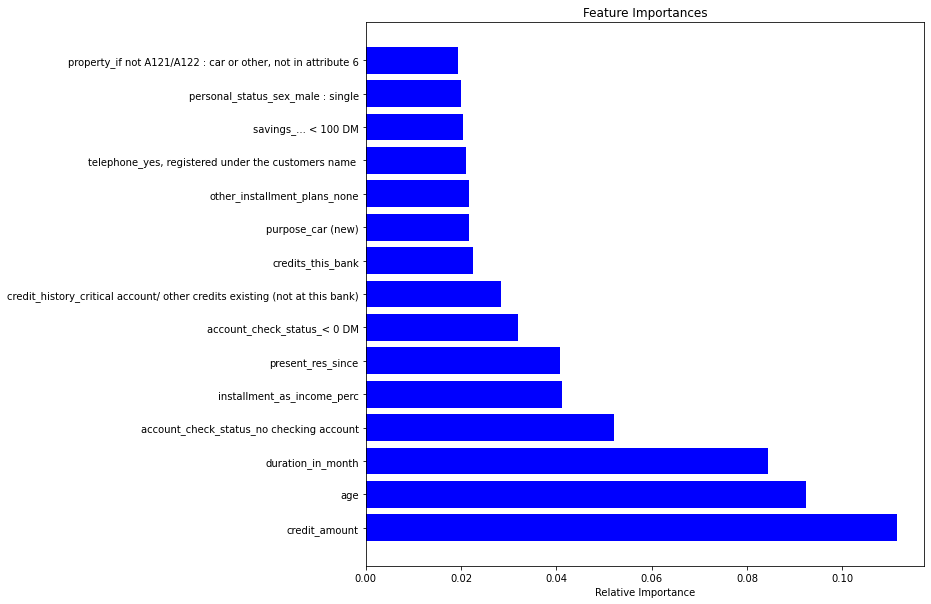

In [18]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dff.columns[:]
features= a.drop('default',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [36]:
importances

array([0.08451323, 0.11154502, 0.04117958, 0.04065404, 0.09233554,
       0.02255976, 0.01200276, 0.03184956, 0.00973999, 0.05205309,
       0.02834304, 0.01130516, 0.01664265, 0.01322806, 0.01285038,
       0.02161696, 0.01065334, 0.017483  , 0.00474981, 0.00305326,
       0.01435529, 0.00281282, 0.00151516, 0.02033545, 0.01058971,
       0.00802666, 0.01419431, 0.01603912, 0.01790855, 0.01422211,
       0.0121048 , 0.00695238, 0.0100211 , 0.02005598, 0.00851219,
       0.01178082, 0.01934654, 0.0183493 , 0.01580094, 0.02158753,
       0.00596934, 0.01778105, 0.01210685, 0.01818631, 0.0030449 ,
       0.01363114, 0.02095786, 0.00545355])

In [19]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [20]:
"Train Accuracy:"
(trainResult*100.0)

100.0

In [21]:
"Test Accuracy:"
(testResult*100.0)

75.33333333333333

# K-fold cross-validation

k-fold cross validation( without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [23]:
num_folds = 10
seed = 77

In [24]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [25]:
results = cross_val_score(rfm,X, y, cv=kfold)
results

array([0.87, 0.67, 0.79, 0.81, 0.81, 0.68, 0.75, 0.78, 0.75, 0.76])

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
num_folds = 10
seed = 77

In [28]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [29]:
results = cross_val_score(rfm,X, y, cv=kfold)
results

array([0.87, 0.67, 0.79, 0.81, 0.81, 0.68, 0.75, 0.78, 0.75, 0.76])

In [30]:
np.mean(abs(results))

0.767

In [31]:
results.std()

0.057105166141076934

Leave One Out Cross-Validation

In [32]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [41]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(rfm, X_train, y_train, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1.

Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either 
defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [ ]:
scores.mean()

In [ ]:
scores.std()

# Stratified cross-validation( Bonus)

k-fold cross validation with stratification

In [ ]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(rfm, X, y, cv = stratified_kfold)

In [ ]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

# Bootstrapping ( Bonus)

Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data 
(with/without replacement)

Create a model with each bootstrap sample and validate it with the test set

Final result is calculated by averaging the accuracy of models

In [42]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [43]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Inference:

Here crossfold validation with stratification gives better result than Bootstrapping.